In [1]:
!pip install fastai==2.7

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.6/213.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 MB 21.5 MB/s eta 0:00:0000:0100:01
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.3 MB/s eta 0:00:00
DEPRECATION: pytorch-lightning 1.7.0 has a non-standard dependency specifier torch>=1.9.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: torch
    Found existing installation: torch 2.2.0
    Uninstalling torch-2.2.0:
      Successfully uninstalled to

In [2]:
import os
from fastai.vision.all import *

/Users/Ashish.Jha/anaconda3/envs/python39/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/Ashish.Jha/anaconda3/envs/python39/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefINS2_6SymIntEEENS2_8optionalINS2_10ScalarTypeEEENS6_INS2_6LayoutEEENS6_INS2_6DeviceEEENS6_IbEENS6_INS2_12MemoryFormatEEE
  Referenced from: <3F789787-FE38-3CE7-8599-064BDD0416EE> /Users/Ashish.Jha/anaconda3/envs/python39/lib/python3.9/site-packages/torchvision/image.so
  Expected in:     <F008E7E7-AB21-3358-8168-A868137DB04F> /Users/Ashish.Jha/anaconda3/envs/python39/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib
  warn(f"Failed to load image Python extension: {e}")


In [3]:
path = untar_data(URLs.MNIST)
print(path)

/Users/Ashish.Jha/.fastai/data/mnist_png


In [4]:
files = get_image_files(path/"training")
print(len(files))
print(files[0])

60000
/Users/Ashish.Jha/.fastai/data/mnist_png/training/9/36655.png


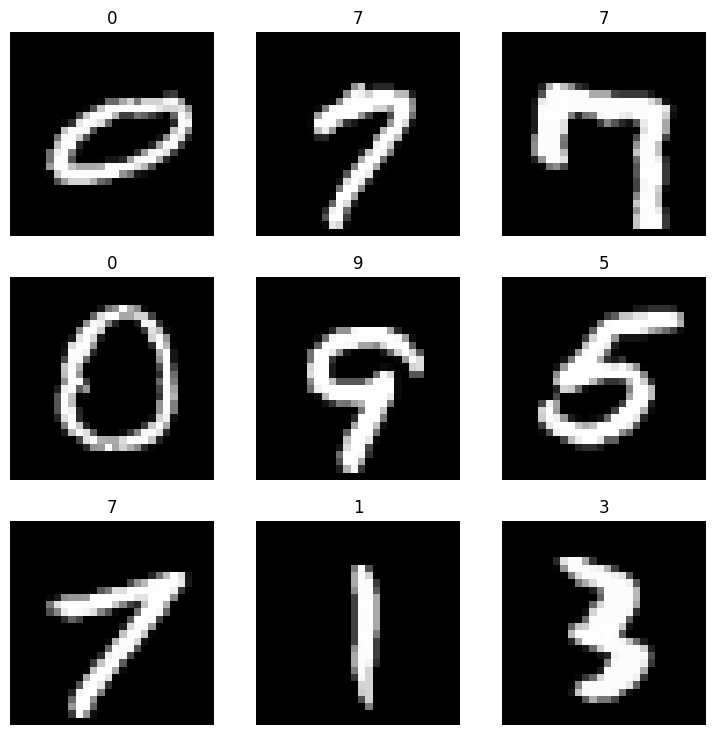

In [5]:
def label_func(f): return f.parent.name
dls = ImageDataLoaders.from_path_func(path, fnames=files, label_func=label_func, num_workers=0)
dls.show_batch()

In [6]:
learn = vision_learner(dls, arch=resnet18, metrics=accuracy)

/Users/Ashish.Jha/anaconda3/envs/python39/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/Ashish.Jha/anaconda3/envs/python39/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0012022644514217973)

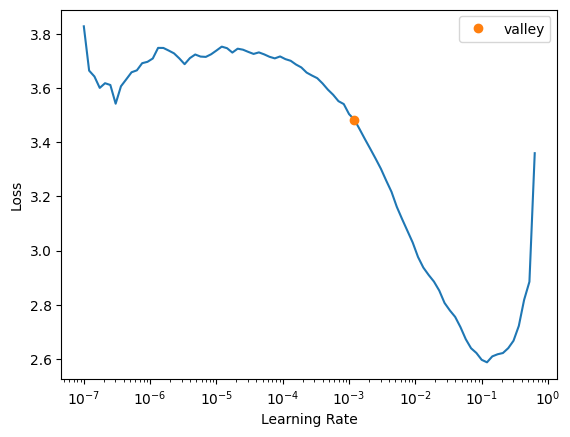

In [7]:
learn.lr_find()

In [8]:
learn.fine_tune(epochs=2, base_lr=0.0012, freeze_epochs=1)

epoch,train_loss,valid_loss,accuracy,time
0,0.878584,0.633181,0.802417,01:08


epoch,train_loss,valid_loss,accuracy,time
0,0.160844,0.098066,0.969167,01:56
1,0.080117,0.069436,0.978333,01:56


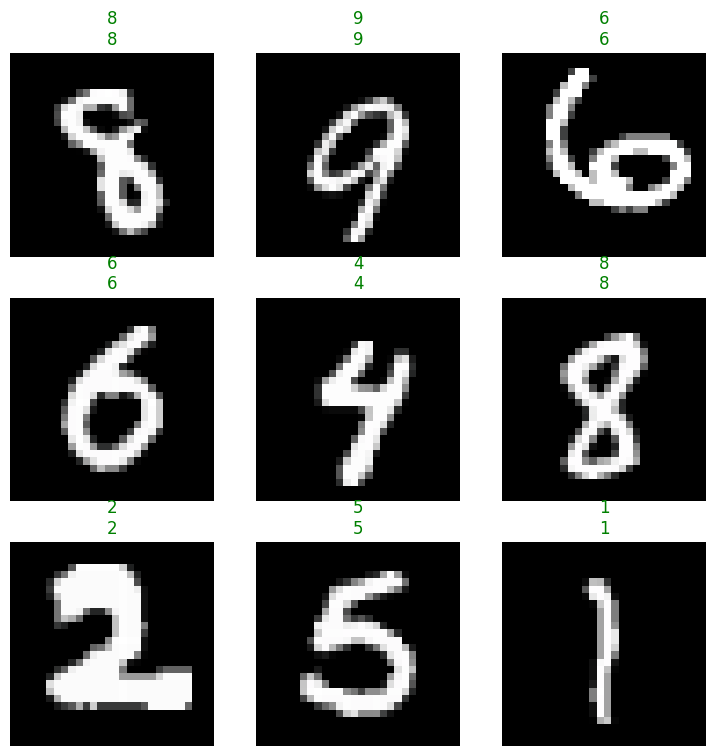

In [9]:
learn.show_results()

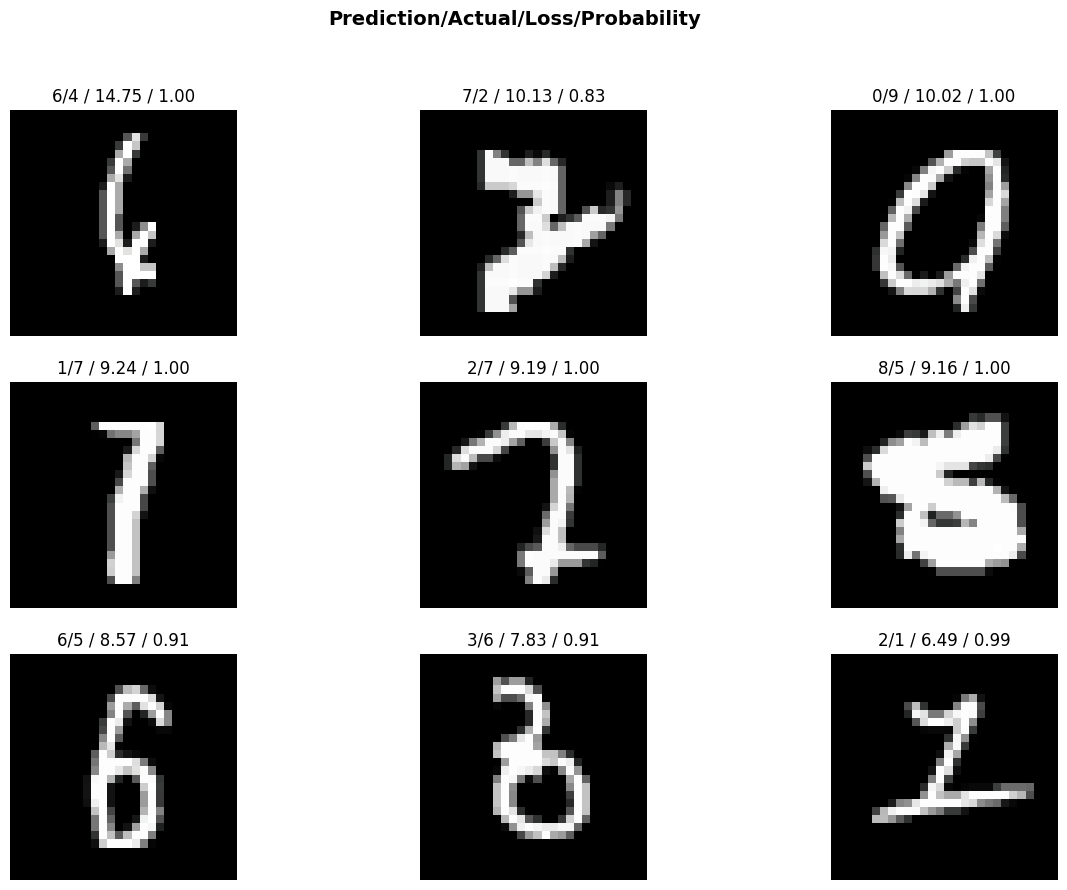

In [10]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))